In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
sns.set_theme(style='darkgrid')

In [2]:
df= pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info() #there are no null values in the data, thus data cleaning is minimal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.columns = ['gender', 'race', 'parentEducation', 'lunch',
       'test_prep_course', 'math_score', 'reading_score',
       'writing_score']
#changing column name for ease of use

In [7]:
df.parentEducation.unique(),df.test_prep_course.unique(),df.race.unique(),df.gender.unique(),df.lunch.unique()
# unique valesu present in the data

(array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['none', 'completed'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(['female', 'male'], dtype=object),
 array(['standard', 'free/reduced'], dtype=object))

###### It is evident form the plot that Group C has the higest number of students for both genders, followed D,B,E and A. Again proportion of males to female is also similar with more females than males for the highest 2 groups.

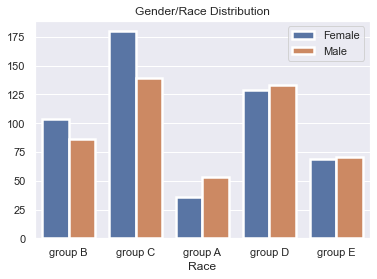

In [8]:
#df[['race','gender']].value_counts().plot(kind='bar')

sns.countplot(data=df,x='race',hue='gender',linewidth=2.5)
plt.ylabel('')
plt.xlabel('Race')
plt.legend(['Female','Male'])
plt.title('Gender/Race Distribution');

###### it can be said that regardless of the parents education less than 50% of the students have taken free or reduced lunch.An average of  36% of  students go for reduced lunch.

In [9]:
def chartlabel(axis):
    '''This function is used to label a bar plot rectangle'''
    m = axis.patches
    for i in range(len(m)): #looping through patches
        if i<int(len(m)/2): #since the first bars are listed, sequence is divided into two
            txt=(m[i].get_height()/(m[i].get_height()+m[i+int(len(m)/2)].get_height())*100).round(1)    #we use the bar heights to determine the percentage
            g.text(m[i].get_x(),m[i].get_height(),str(txt)+ '%')   #use bar location and height to write text
            txt=(m[i+int(len(m)/2)].get_height()/(m[i].get_height()+m[i+int(len(m)/2)].get_height())*100).round(1)
            g.text(m[i+int(len(m)/2)].get_x(),m[i+int(len(m)/2)].get_height(),str(txt)+ '%')

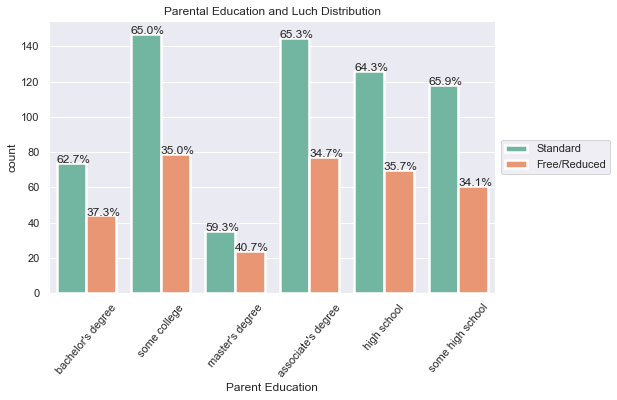

In [10]:
plt.subplots(figsize=(8,5))
g=sns.countplot(data=df,x='parentEducation',hue='lunch',linewidth=2.5,palette="Set2")
plt.xticks(rotation=50);
plt.xlabel('Parent Education')
plt.title('Parental Education and Luch Distribution')
plt.legend(['Standard','Free/Reduced'],loc='center left', bbox_to_anchor=(1, 0.5));


chartlabel(g)

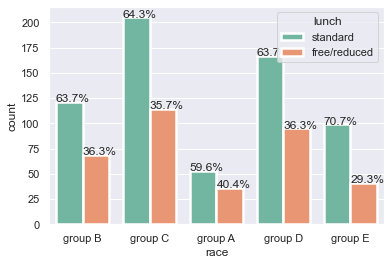

In [11]:
g=sns.countplot(data=df,x='race',hue='lunch',linewidth=2.5,palette="Set2")
chartlabel(g)

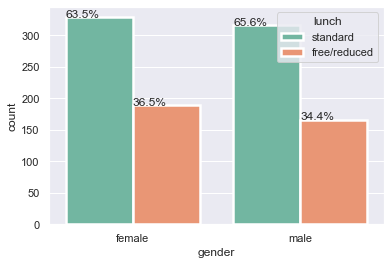

In [12]:
g=sns.countplot(data=df,x='gender',hue='lunch',linewidth=2.5,palette="Set2")

chartlabel(g)

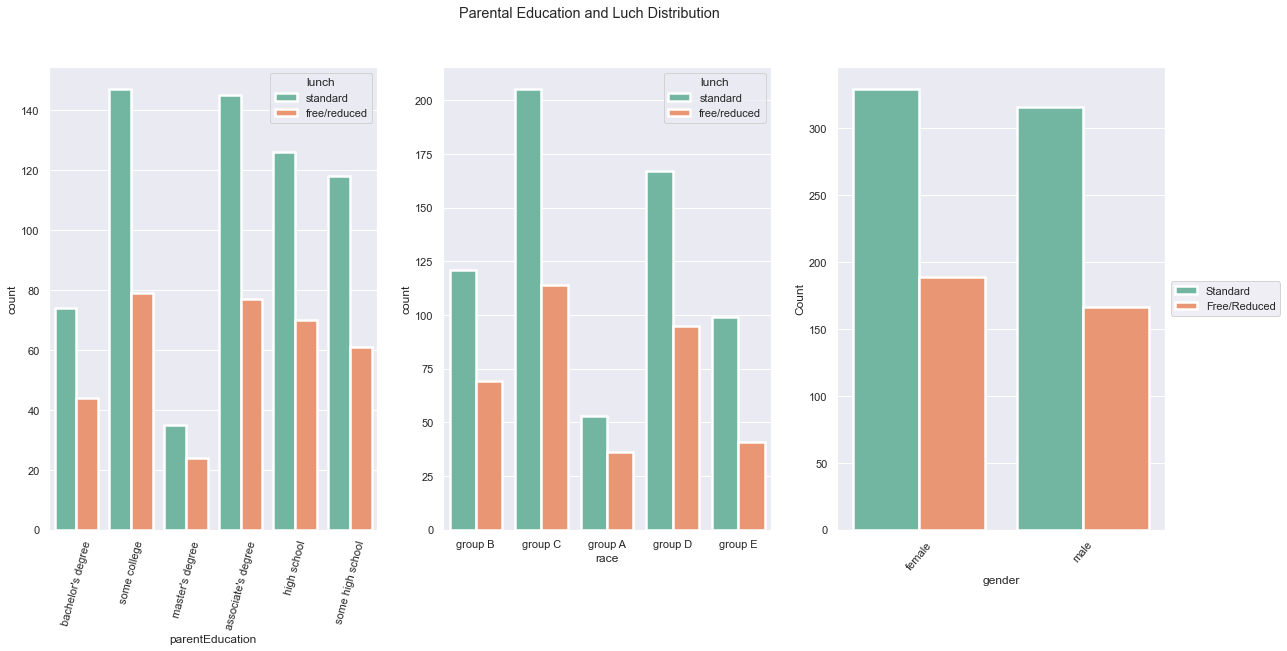

In [13]:
fig,axes=plt.subplots(1,3,figsize=(20,8.5));

sns.countplot(data=df,x='parentEducation',hue='lunch',linewidth=2.5,palette="Set2",ax=axes[0]).set_xticklabels(axes[0].get_xticklabels(),rotation = 75);
sns.countplot(data=df,x='race',hue='lunch',linewidth=2.5,palette="Set2",ax=axes[1])
sns.countplot(data=df,x='gender',hue='lunch',linewidth=2.5,palette="Set2",ax=axes[2])

for i in range(3):
    chartlabel(axes[i])

#plt.tight_layout();


plt.xticks(rotation=50);
plt.ylabel('Count')
plt.suptitle('Parental Education and Luch Distribution')
plt.legend(['Standard','Free/Reduced'],loc='center left', bbox_to_anchor=(1, 0.5));


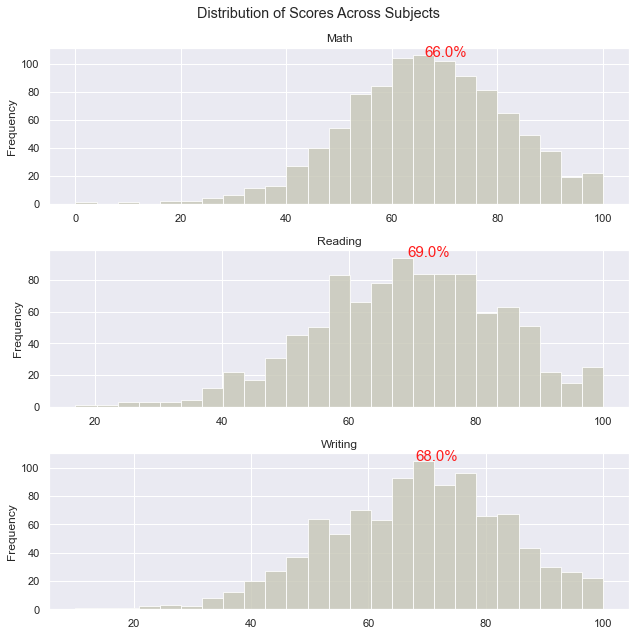

In [14]:
plt.figure(figsize=(9,9))
plt.subplot(311)
math=df.math_score.plot(kind='hist', bins=25, color='#c6c6b6',edgecolor='w',alpha=.8)
math.text(df.math_score.mean(),105,str(round(df.math_score.mean(),0))+'%',fontsize=15,color='#ff1c1c')
plt.title('Math')

plt.subplot(312)
reading=df.reading_score.plot(kind='hist', bins=25, color='#c6c6b6',edgecolor='w',alpha=.8)
reading.text(df.reading_score.mean(),95,str(round(df.reading_score.mean(),0))+'%',fontsize=15,color='#ff1c1c')
plt.title('Reading')

plt.subplot(313)
writing=df.writing_score.plot(kind='hist', bins=25, color='#c6c6b6',edgecolor='w',alpha=.8)
writing.text(df.writing_score.mean(),105,str(round(df.writing_score.mean(),0))+'%',fontsize=15,color='#ff1c1c')
plt.title('Writing')


plt.suptitle('Distribution of Scores Across Subjects');
plt.tight_layout()

##### it is evident that the average score for the subjects is in the late 60's except for math which is in the mid 60's. this could be atrributed to the values of math less than 10

In [15]:
df_cat=df

In [16]:
df_cat.gender = df.gender.replace({'female':0,'male':1})
df_cat.race = df.race.replace({'group A':0,'group B':1,'group C':2,'group D':3,'group E':4})
df_cat.parentEducation = df.parentEducation.replace(
    {'some high school':0,'high school':1,'some college':2,"associate's degree":3,"bachelor's degree":4,"master's degree":5}
)
df_cat.lunch = df.lunch.replace({'standard':0,'free/reduced':1})
df_cat.test_prep_course = df.test_prep_course.replace({'none':0,'completed':1})

In [17]:
df.parentEducation.unique(),df.test_prep_course.unique(),df.race.unique(),df.gender.unique(),df.lunch.unique()

(array([4, 2, 5, 3, 1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 2, 0, 3, 4], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64))

#### Data Preprocessing

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
df['average_score'] = round(df[['math_score' ,'reading_score' ,'writing_score']].mean(axis=1),1)
df.head()

,gender,race,parentEducation,lunch,test_prep_course,math_score,reading_score,writing_score,average_score
0,0,1,4,0,0,72,72,74,72.7
1,0,2,2,0,1,69,90,88,82.3
2,0,1,5,0,0,90,95,93,92.7
3,1,0,3,1,0,47,57,44,49.3
4,1,2,2,0,0,76,78,75,76.3


In [20]:
x = df[['math_score', 'writing_score', 'reading_score']].reset_index().set_index('index')
y = df['average_score'].reset_index().set_index('index')
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [21]:
model = LinearRegression()

model.fit(x_train,y_train)

accuracy = model.score(x_test, y_test)

accuracy

predictions = model.predict(x_test)


In [22]:
for i in range(len(predictions)):
    print(predictions[x], x_test[x], [y_test[x]])

ValueError: Boolean array expected for the condition, not int64

In [ ]:
df.head()

In [ ]:
x = df.drop(['math_score', 'writing_score', 'reading_score',],axis = 1)